# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
cities_list = pd.Series(cities).reset_index()
cities_list = cities_lat_lon.rename(columns={0:'city'})
cities_list

,index,city
0,0,lebu
1,1,dali
2,2,puerto natales
3,3,dapa
4,4,iqaluit
...,...,...
586,586,malvan
587,587,mariental
588,588,jutai
589,589,lazaro cardenas


In [67]:
# Define an empty list to fetch the weather data for each city
city_data_list = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, row in cities_list.iterrows():
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "http://api.openweathermap.org/data/2.5/weather?"
    city = cities_list.loc[i,'city']
    weather_query_url = f"{city_url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(weather_query_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data_list.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | dali
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | dapa
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | kapuskasing
Processing Record 12 of Set 1 | alenquer
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | morondava
Processing Record 15 of Set 1 | yangor
City not found. Skipping...
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | adrar
Processing Record 18 of Set 1 | tromso
Processing Record 19 of Set 1 | constitucion
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | isafjordur
Processing Rec

In [68]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data_list)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [69]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,15.09,70,4,8.87,CL,1711741616
1,dali,25.7000,100.1833,9.85,90,24,2.27,CN,1711741733
2,puerto natales,-51.7236,-72.4875,5.25,81,75,4.63,CL,1711741734
3,dapa,9.7594,126.0531,25.94,74,3,2.83,PH,1711741734
4,iqaluit,63.7506,-68.5145,-10.15,85,100,2.57,CA,1711741735


In [70]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [71]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,15.09,70,4,8.87,CL,1711741616
1,dali,25.7000,100.1833,9.85,90,24,2.27,CN,1711741733
2,puerto natales,-51.7236,-72.4875,5.25,81,75,4.63,CL,1711741734
3,dapa,9.7594,126.0531,25.94,74,3,2.83,PH,1711741734
4,iqaluit,63.7506,-68.5145,-10.15,85,100,2.57,CA,1711741735


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

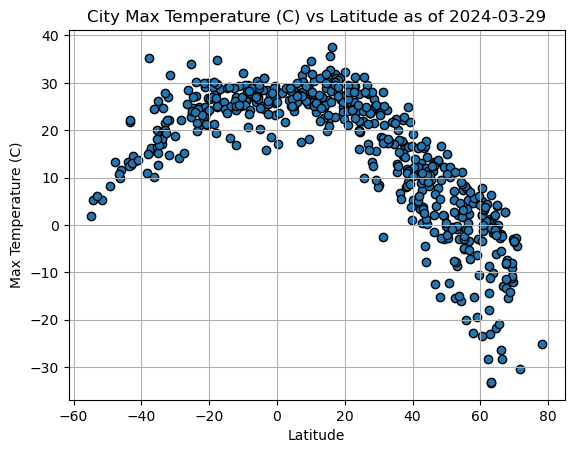

In [75]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Temperature (C) vs Latitude as of 2024-03-29')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

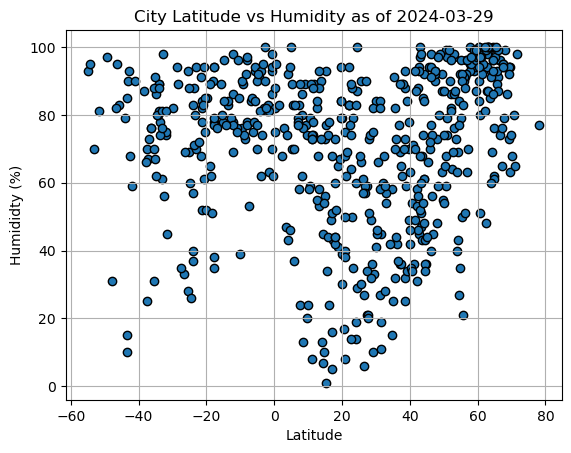

In [76]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humididty (%)')
plt.title('City Latitude vs Humidity as of 2024-03-29')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

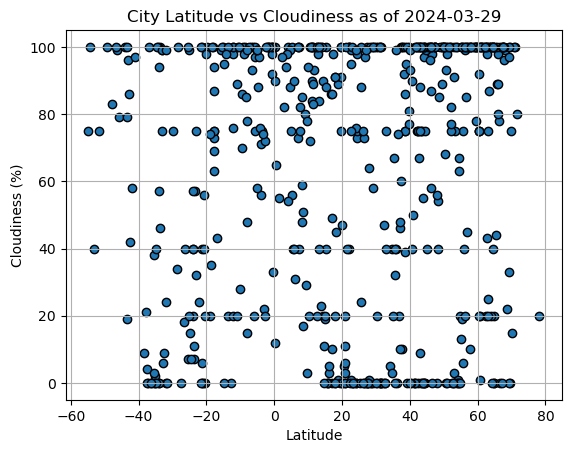

In [77]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness as of 2024-03-29')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

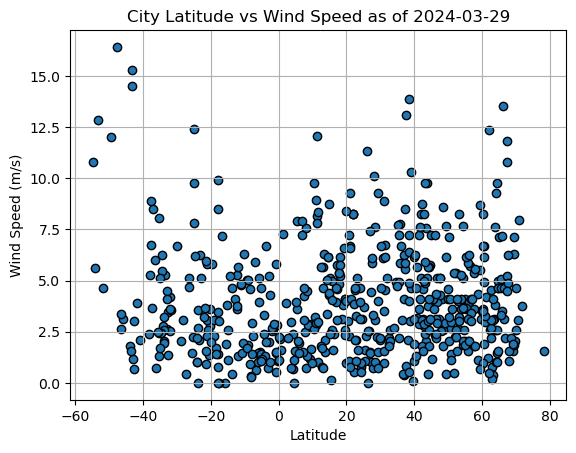

In [78]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed as of 2024-03-29')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: 0.02


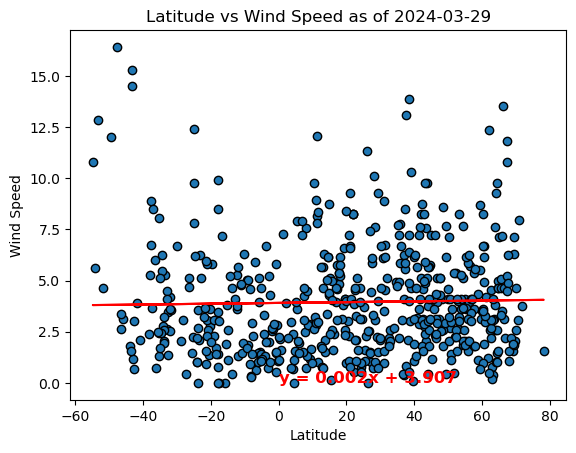

In [122]:
def lin_regress(x_values, x_label, y_values, y_label):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,  edgecolors= "black", label="y=mx+b")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{x_label} vs {y_label} as of 2024-03-29')
    plt.plot(x_values,regress_values,"r-", label="y=mx+b")
   # plt.label("y={0:.1f}x+{1:.1f}".format(slope, intercept))
    print(f'The r-value is: {round(rvalue,2)}')
    plt.text(0,0, 'y = ' + str(round(slope,3)) + 'x' + ' + ' + str(round(intercept,3)), weight='heavy', c='red', size='large')
    plt.show()

lin_regress(city_data_df['Lat'],'Latitude',city_data_df['Wind Speed'],'Wind Speed')

In [12]:
# Define a function to create Linear Regression plots
def lin_regress(x_values, x_label, y_values, y_label):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,  edgecolors= "black")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{x_label} vs {y_label} as of 2024-03-29')
    plt.plot(x_values,regress_values,"r-")
    plt.show()

In [92]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dali,25.7000,100.1833,9.85,90,24,2.27,CN,1711741733
3,dapa,9.7594,126.0531,25.94,74,3,2.83,PH,1711741734
4,iqaluit,63.7506,-68.5145,-10.15,85,100,2.57,CA,1711741735
5,klyuchi,52.2667,79.1667,5.33,86,82,5.38,RU,1711741735
10,kapuskasing,49.4169,-82.4331,-2.95,63,100,6.17,CA,1711741518


In [93]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,15.09,70,4,8.87,CL,1711741616
2,puerto natales,-51.7236,-72.4875,5.25,81,75,4.63,CL,1711741734
6,adamstown,-25.0660,-130.1015,23.69,69,99,12.38,PN,1711741736
7,carnarvon,-24.8667,113.6333,24.59,60,15,7.81,AU,1711741736
8,port elizabeth,-33.9180,25.5701,19.50,89,0,2.06,ZA,1711741737


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.87


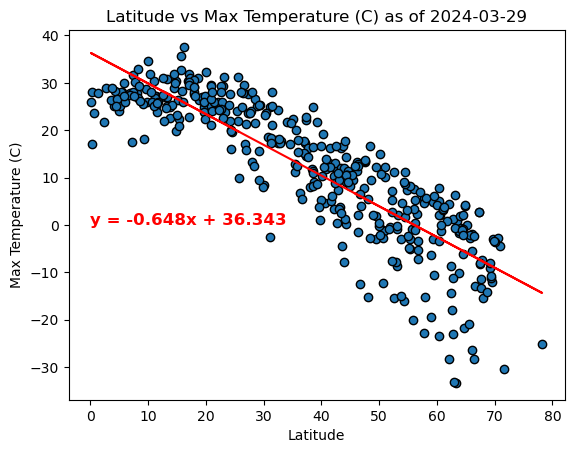

In [123]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df['Lat'],'Latitude',northern_hemi_df['Max Temp'],'Max Temperature (C)')

The r-value is: 0.7


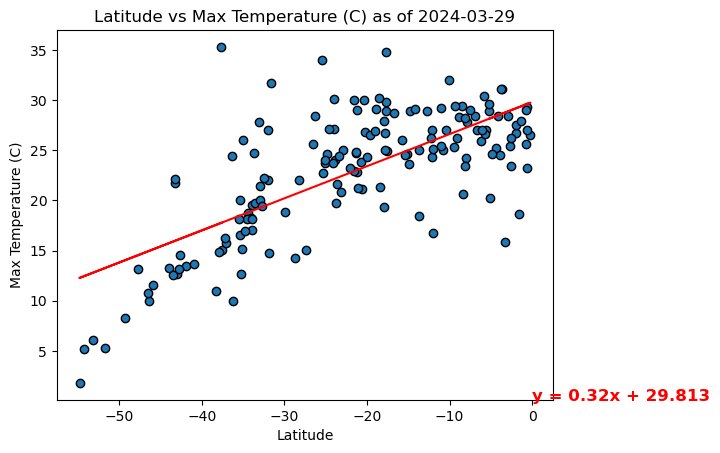

In [124]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df['Lat'],'Latitude',southern_hemi_df['Max Temp'],'Max Temperature (C)')

**Discussion about the linear relationship:**  When looking at the northern vs southern hemispheres, there is clearly a correlation between latitude and max temperature.  The correlation coefficient between temp and lat in the northern hemisphere is -.87, meaning there is a strong negative correlation: the lower the latitude, the higher the temperature.  The correlation coefficient between temp and lat in the southern hemisphere is 0.7, meaning there is a strong positive correlation: the higher the latitude, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.36


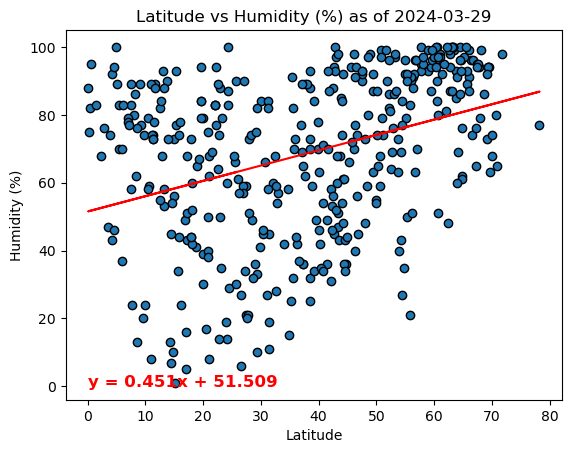

In [125]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Lat'],'Latitude',northern_hemi_df['Humidity'],'Humidity (%)')

The r-value is: 0.2


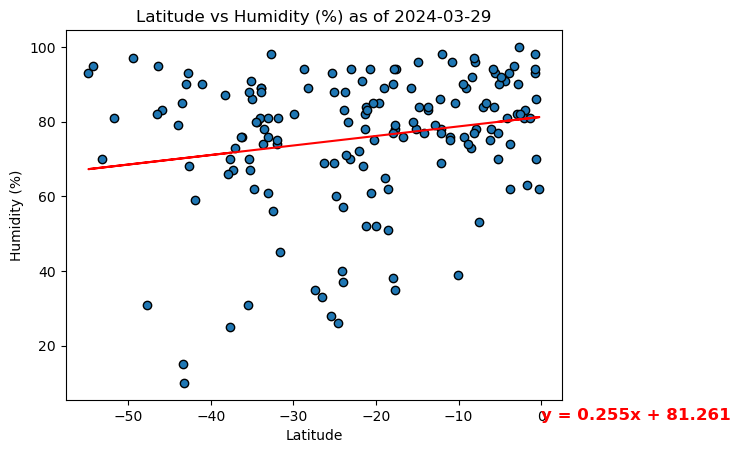

In [126]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Lat'],'Latitude',southern_hemi_df['Humidity'],'Humidity (%)')

**Discussion about the linear relationship:** Judging by the correlation coefficients comparing Humidity and Latitude in the northern and southern hemisphere, it looks like there is a weak correlation between the two.  Surprisingly, both northern and southern hemispheres have a weak POSITIVE correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12


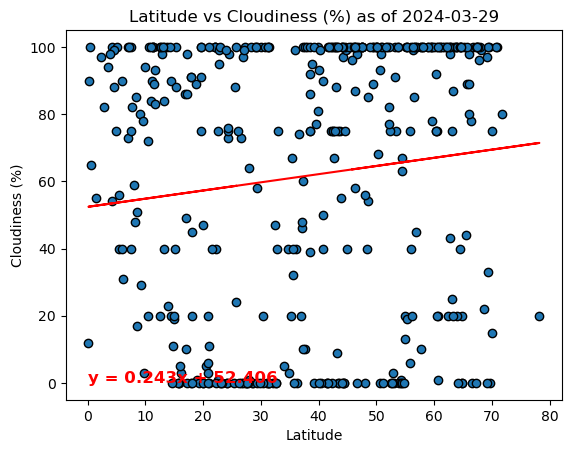

In [127]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Lat'],'Latitude',northern_hemi_df['Cloudiness'],'Cloudiness (%)')

The r-value is: 0.24


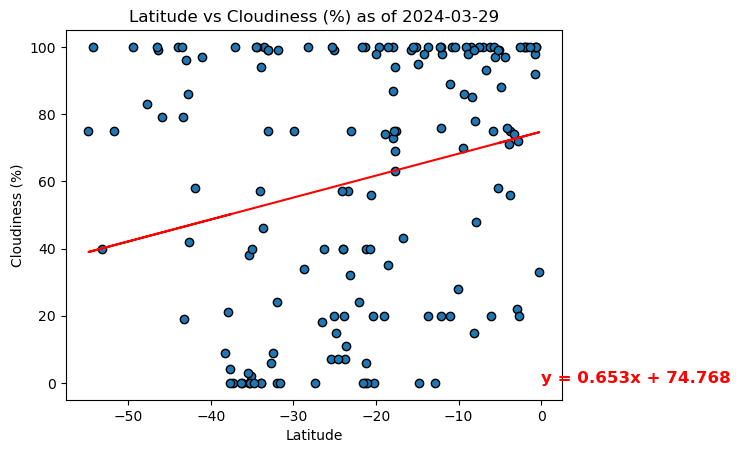

In [128]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Lat'],'Latitude',southern_hemi_df['Cloudiness'],'Cloudiness (%)')

**Discussion about the linear relationship:** Judging by the correlation coefficients comparing Cloudiness to Latitude, in both the northern and southern hemispheres there appears to be a weak positive correlation between Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05


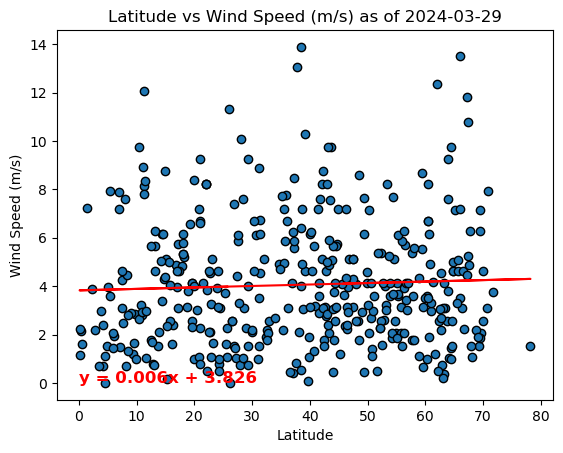

In [129]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Lat'],'Latitude',northern_hemi_df['Wind Speed'],'Wind Speed (m/s)')

The r-value is: -0.36


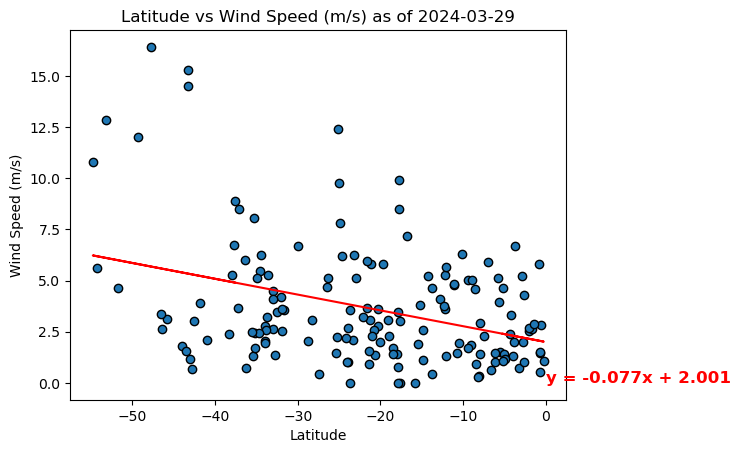

In [130]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Lat'],'Latitude',southern_hemi_df['Wind Speed'],'Wind Speed (m/s)')

**Discussion about the linear relationship:** Judging by the correlation coefficients, while there doesn't appear to be a correlation between wind speed and latitude in the northern hemisphere, there does appear to be a weak negative correlation between wind speed and latitude in the southern hemisphere.